 # <center>Final Exam &ndash; DATA 3401 (Fall 2022)</center>

## Start Date: 12/5
## Due Date: 12/14 (at 1:30pm) &ndash; this is a hard deadline so don't miss it!

## Final Rules
This final exam is simliar to the midterm exam. Please work the exercises below **on your own**.  When you have completed the exam, you should push your completed jupyter notebook to your GitHub repo for this class in the **Exams->Final** folder.

You may not discuss the problems with **anyone else**, including persons on an online internet forum. Consulting an outside source like this will be considered an academic integrity violation. **Any questions should be referred to me.**

You may use all class resources including previous labs and lectures, and anything posted on the course GitHub repo. 

You may not use any function that trivializes a problem. For example, if I ask you to write a `max` function that computes the maximum entry in a list, you are not allowed to use the pre-defined Python function `max`; you must write your own.

Each problem below will be worth approximately 25 points, and the Bonus will be worth 10. Achieving over 100 on this exam is possible if the Bonus is completed.

## Exercise 1
In this exercise you will be working with the files abalone.names and abalone.data in the Final Exam folder.

1. Open the abalone.names file in your notebook. Using the information there, in a new cell briefly describe the data set and relevant features.
1. Load the abalone.data file into a dataframe using pandas. Print the .head() of the dataframe
1. Using the .names file, **add** a header line to your dataframe describing each column of data
1. Take the last column and make a new dataframe called `labels`
    1. Print out the value counts of each label.
    1. What do you notice about the distribution of the labels?
    1. Based on your observations, propose a way to modify the labels to consolidate some of the classes, and do this modification (you should describe in comments in your code what change you are making)
    1. After making your modification, show the value counts of the new labels again
1. Make a scatterplot of each feature against the others (it should be a single plot)
    1. Describe any trends or correlations that you see.
1. As in the Titanic lecture and previous lab, plot 2 stacked histograms of any features you like, color coded by the label. Describe any trends you see.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import math
import random

In [3]:
#print(open('abalone.names', 'r').read())
headers =  ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
data = pd.read_csv('abalone.data', header=0)
data.columns = headers
(data.head())

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [11]:
x = np.array(data.iloc[: , 1:])
y = np.array(data.iloc[: , 0])
print(x)
print(y)

[[ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 [ 0.44    0.365   0.125  ...  0.114   0.155  10.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]
['M' 'F' 'M' ... 'M' 'F' 'M']


In [9]:
men = data.loc[data.Sex == 'M'].value_counts()
women = data.loc[data.Sex == 'F'].value_counts()
infant = data.loc[data.Sex == 'I'].value_counts()
m = 
print(men)
print(women)
print(infant)
#We can consolidate the weights
data["Weights"] = data["Whole weight"].astype(str)+","+data["Shucked weight"].astype(str) + "," + data["Viscera weight"].astype(str) + "," + data["Shell weight"]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
M    0.155   0.110     0.040   0.0155        0.0065          0.0030          0.0050        3        1
     0.615   0.475     0.170   1.1825        0.4740          0.2895          0.2400        11       1
             0.485     0.215   0.9615        0.4220          0.1760          0.2900        11       1
             0.480     0.190   1.3600        0.5305          0.2375          0.4700        18       1
                       0.185   1.2205        0.4985          0.3150          0.3300        10       1
                                                                                                   ..
     0.535   0.420     0.125   0.7380        0.3550          0.1895          0.1795        8        1
             0.415     0.135   0.7800        0.3165          0.1690          0.2365        8        1
             0.410     0.150   0.8105        0.3450          0.1870          0.2400    

TypeError: can only concatenate str (not "float") to str

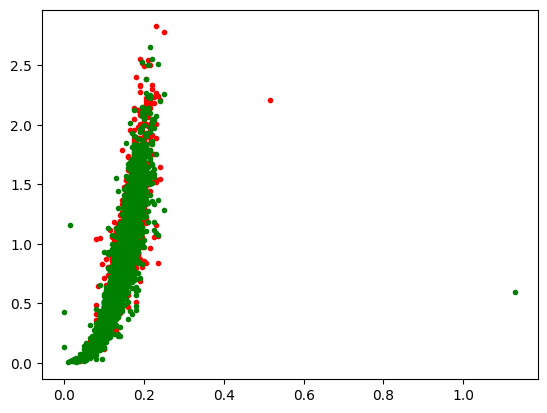

In [12]:
plt.figure()
plt.plot(x[y== 'M',2],x[y== 'M',3],'r.')
plt.plot(x[y== 'F',2],x[y== 'F',3],'g.')
plt.plot(x[y== 'I',2],x[y== 'I',3],'g.')
plt.show()

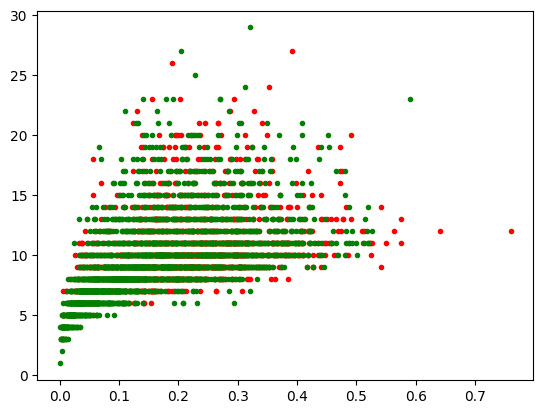

In [13]:
plt.figure()
plt.plot(x[y== 'M',5],x[y== 'M',7],'r.')
plt.plot(x[y== 'F',5],x[y== 'F',7],'g.')
plt.plot(x[y== 'I',5],x[y== 'I',7],'g.')
plt.show()

## Exercise 2
If you invest a principal value of $P$ at time 0, and interest is continuously compounded at a rate $r$ (between 0 and 1), then the amount of money you would have after $t$ years is
$$M(t) = Pe^{rt}.$$
Fry has \\$0.01 in his bank account, but is accidentally transported 1,000 years into the future. He returns to his bank (which luckily still exists) to see how much money he now has. Assume Fry's account earns continuously compounded interest at a rate of 5\% (or $r=0.05$).
1. Create a numpy array of time from 0 to 1,000 years increasing by 1 year
1. Create a new numpy array that calculates how much money Fry's account has at each year
1. Plot Fry's money over the given timeframe

Now if Fry only earned simple interest, the amount of money he would have after $t$ years would be
$$ S(t) = P(1+rt).$$

1. Perform the same procedure as steps 1-3 above assuming Fry earns 5\% simple interest.
1. To illustrate the difference, also plot $M(t)-S(t)$ over the timeframe.
1. What do you conclude?

*Aside:* This problem, while silly, should teach you an important lesson: invest your money as early as you possibly can!

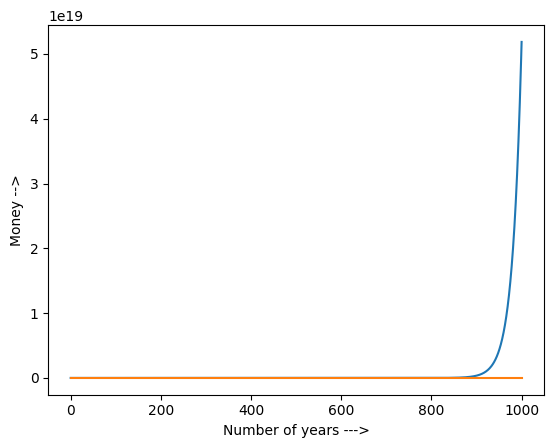

In [5]:
def compoundInterest(p,r,t):
    return p * math.e ** (r*t)
def simple(p,r,t):
    return p * (1 + (r*t))
p=0.01
r=0.05
n=1000
t=np.linspace(0,n,n) 

simple = simple(p,r,t)
continous = compoundInterest(p,r,t)
plt.xlabel("Number of years --->")
plt.ylabel("Money -->")
plt.plot(t,continous)
plt.plot(t,simple)
#Fry will make way more money in continous compund interest

## Exercise 3
In Lab 7 you coded a random walk in 1-dimension. Here you will code a 2-dimensional random walk.  
1. As before, write a function `random_walk(num_steps,init_position)` that takes an integer for `num_steps` corresponding to how many steps the random walker will take, and a numpy array for `init_position` with x and y coordinates of the starting point. The function should return the full sequence of positions of the walker as they take `num_steps` steps
1. To determine the next location of the walker at a given step, the walker uniformly randomly chooses to walk one of 4 possible directions: up, down, left, or right and takes a step of length 1 in either direction (e.g., if the walker starts at (0,0), their possible moves for the first step are up=(0,1), down=(0,-1), left=(-1,0), right=(1,0))
1. Call your `random_walk` function 5 times with initial position of (0,0) and 10,000 steps and plot the random walk for each function call using pyplot (here is an example of what it should look like; if the image does not render in GitHub, open 2drandomwalk.png in the Final folder)
![2drandomwalk.png](2drandomwalk.png)
1. What do you notice?
1. Modify your random walk such that the walker is more likely to travel up (specifically, they will step up with probability .7 and the remaining directions each with probability .1).
1. Call your modified random walk function 5 times and plot the results.
1. What do you notice? Is there a difference in behavior compared to the original version?

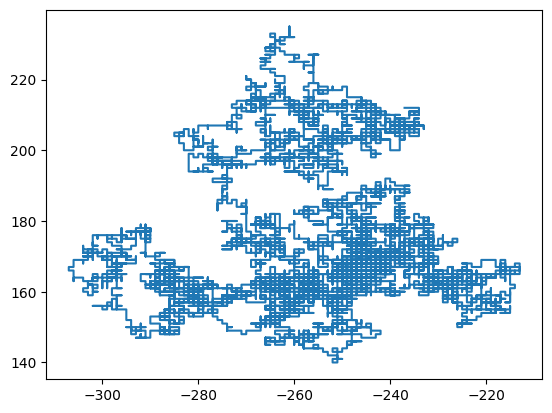

In [6]:
def random(num_sims, num_steps, init_position_x, init_position_y):
    randos = ["U", "D", "L", "R"]

    for j in range(num_sims):
        for i in range(num_steps):
            rn = np.random.choice(randos)
            if rn == "U":
                init_position_x[i] = init_position_x[i - 1]
                init_position_y[i] = init_position_y[i - 1] + 1
            if rn == "D":
                init_position_x[i] = init_position_x[i - 1]
                init_position_y[i] = init_position_y[i - 1] - 1
            if rn == "L":
                init_position_x[i] = init_position_x[i - 1] - 1
                init_position_y[i] = init_position_y[i - 1]
            if rn == "R":
                init_position_x[i] = init_position_x[i - 1] + 1
                init_position_y[i] = init_position_y[i - 1]
        j = j + 1
    
    return init_position_x, init_position_y


num_steps = 10000
num_sims = 5
init_position_x = np.zeros(num_steps)
init_position_y = np.zeros(num_steps)
final_x , final_y = random(num_sims, num_steps, init_position_x, init_position_y)
plt.plot(final_x, final_y)
plot.show()
#After changing the probablity the random walk function goes up more often (70% more)

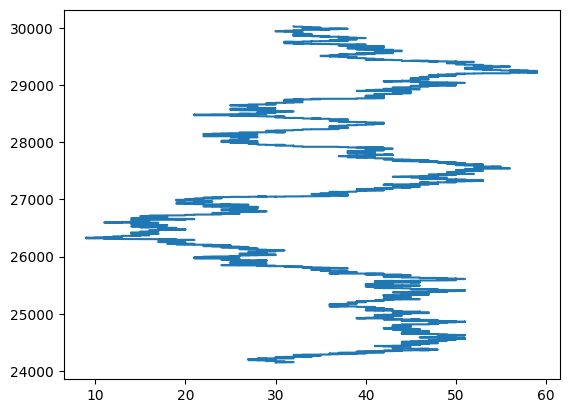

In [7]:
def random(num_sims, num_steps, init_position_x, init_position_y):
    randos = ["U", "D", "L", "R"]
    probs = [0.7, 0.1, 0.1, 0.1]

    for j in range(num_sims):
        for i in range(num_steps):
            rn = np.random.choice(randos, p=probs)
            if rn == "U":
                init_position_x[i] = init_position_x[i - 1]
                init_position_y[i] = init_position_y[i - 1] + 1
            if rn == "D":
                init_position_x[i] = init_position_x[i - 1]
                init_position_y[i] = init_position_y[i - 1] - 1
            if rn == "L":
                init_position_x[i] = init_position_x[i - 1] - 1
                init_position_y[i] = init_position_y[i - 1]
            if rn == "R":
                init_position_x[i] = init_position_x[i - 1] + 1
                init_position_y[i] = init_position_y[i - 1]
        j = j + 1
    
    return init_position_x, init_position_y


num_steps = 10000
num_sims = 5
init_position_x = np.zeros(num_steps)
init_position_y = np.zeros(num_steps)
final_x , final_y = random(num_sims, num_steps, init_position_x, init_position_y)
plt.plot(final_x, final_y)
plot.show()

## Exercise 4
1. Create a `card` class that has two attributes: `value` and `suit`. A card should be initialized by passing it both the value and suit.
1. Create a `deck` class to represent a deck of cards.
    1. Each card in the deck should be of type card (the class you made in Step 1)
    1. Your deck should be a list of 52 cards
    1. Your deck should be ordered, and should have the option of `shuffled` (True or False) upon initialization. If `shuffled` is False, the deck should be in order (Ace-King-...-2 of Spades, Ace-King-...-2 of Clubs, Ace-King-...-2 of Diamonds, Ace-King-...-2 of Hearts), otherwise if `shuffled` is True, the deck should be randomly ordered
    1. Create a method `deal_cards(num_cards)` that chooses the **first** `num_cards` cards from the deck and returns a list of these cards. This method should also remove the cards from the deck.
    1. Create a `shuffle` method to shuffle the deck. This should return a deck object.
1. Create a subclass of `deck` called `hand`
    1. A `hand` will be a list of cards
    1. A `hand` should be initialized with an option of `num_cards` for the number of cards in the hand, and should be initialized via the `deal_cards` method of your `deck` class
    1. Create (or repurpose an old function from class/lab) a method to check if the hand is a flush, and if so determine the suit (your method should return True or False and the suit (or None if False)
    1. Create a method to check if a hand is a straight (consecutive cards; for simplicity, assume Ace is high (i.e., Ace, King, ..., 2 is the order of the numbers))
1. Using your classes, create an **unshuffled** deck, and deal 5 hands of 5 cards each. 
    1. Check if each hand is a flush, and report the results along with the suits of the flush(es). 
    1. Check if each hand is a straight and report the results
1. Create a **shuffled** deck and deal 9 hands of 5 cards. Check for straights and flushes and report the results.

In [8]:
import random
class Card:
    def __init__(self,suit, value):
        self.suit = suit
        self.value = value
    def show(self):
        print(self.value, self.suit)

        
class Deck:
    def __init__(self):
        self.cards = []
        self.build()
        
    def build(self):
        cardS = ["Spades", "Clubs", "Diamonds", "Hearts"]
        for i in cardS:
            for j in range(1,14):
                self.cards.append(Card(i,j))
                
    def show(self):
        for i in self.cards:
            i.show()
    
    def shuffle(self):
        for i in range(len(self.cards) - 1, 0, -1):
            rn = random.randint(0,i)
            self.cards[i], self.cards[rn] = self.cards[rn], self.cards[i]
            
    def deal(self, amount):
        return list(self.cards.pop() for _ in range(amount))
    
class Hand(Deck):
    def __init(self, name):
        self.name = name
        self.hand = []
    def draw(self,deck):
        self.hand.append(Deck.deal(5))
        return self
    def showhand(self):
        for card in self.hand:
            card.show()
  
deck = Deck()
deck.shuffle()
Hand = Hand()
Hand.showhand()

AttributeError: 'Hand' object has no attribute 'hand'

## Bonus (10 points)

Using the abalone data set from Exercise 1, implement a simple classifier (for example, look up k-nearest neighbors, or kNN, classifiers in sklearn) to try to classify the data.
1. You should split the data into a training set that has labels and a testing set that does not. You may use about 80% of the data as training and 20% as testing.
1. You should report the accuracy of your classifier on both the training and testing sets.
1. Write a brief description about how the classifer you choose works to do the classification.
1. Discuss your results.

In [ ]:
# Write your code here